**Dataset 1995 wdbc - algorithms**

Classes:

benign -> 0

malign -> 1

In [1]:
library(tidyverse)
library(psych)

if(!require('readr')) {
    install.packages('readr')
    library('readr')
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




**Load wdbc dataset**

In [3]:
df_wdbc <- read.csv(paste("wdbc.csv","", sep=""))
df_wdbc$X<-NULL
df_wdbc$id<-NULL

In [4]:
df_wdbc

diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave.points_1ean,sy11etry_1ean,⋯,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave.points_worst,sy11etry_worst,fractal_di1ension_worst
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902
1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758
1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300
1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440
1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,⋯,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368
1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,⋯,17.06,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510
1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,⋯,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720


In [5]:
table(df_wdbc$diagnosis)


  0   1 
357 212 

**Split dataset**

In [6]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [7]:
# split dataset into training and test sets
set.seed(123)
division <- sample(nrow(df_wdbc), floor(0.7 * nrow(df_wdbc)), replace = FALSE)
training <- df_wdbc[division, ]
test <- df_wdbc[-division, ]

In [10]:
training_set <- training[, 2:31]
test_set <- test[, 2:31]

In [14]:
head(training_set)

,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave.points_1ean,sy11etry_1ean,fractal_di1ension_1ean,⋯,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave.points_worst,sy11etry_worst,fractal_di1ension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
415,15.130,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,0.1852,0.05294,⋯,17.260,36.91,110.10,931.4,0.11480,0.09866,0.154700,0.065750,0.3233,0.06165
463,14.400,26.99,92.25,646.1,0.06995,0.05223,0.034760,0.017370,0.1707,0.05433,⋯,15.400,31.98,100.40,734.6,0.10170,0.14600,0.147200,0.055630,0.2345,0.06464
179,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,⋯,14.000,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
526,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,⋯,9.473,18.45,63.30,275.6,0.16410,0.22350,0.175400,0.085120,0.2983,0.10490
195,14.860,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,⋯,16.080,27.78,118.60,784.7,0.13160,0.46480,0.458900,0.172700,0.3000,0.08701
118,14.870,16.67,98.64,682.5,0.11620,0.16490,0.169000,0.089230,0.2157,0.06768,⋯,18.810,27.37,127.10,1095.0,0.18780,0.44800,0.470400,0.202700,0.3585,0.10650


In [13]:
head(test_set)

,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave.points_1ean,sy11etry_1ean,fractal_di1ension_1ean,⋯,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave.points_worst,sy11etry_worst,fractal_di1ension_worst
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,⋯,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,⋯,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
9,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,⋯,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
15,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,⋯,15.03,32.01,108.8,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
17,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,⋯,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.1609,0.3029,0.08216
18,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,⋯,20.96,31.48,136.8,1315.0,0.1789,0.4233,0.4784,0.2073,0.3706,0.11420


-------------------------------------------------------------------------------------------------

**KNN**

In [15]:
library(class)

# KNN model
model_knn <- knn(training_set, test_set, training$diagnosis, k = 5)
print('Confusion matrix train')
table(factor(model_knn))

# predictions
predictions <- as.factor(model_knn) # convert to factor

# evaluate model performance
confusion_matrix <- table(predictions, test$diagnosis)
accuracy <- sum(diag(confusion_matrix))/sum(confusion_matrix)

print('Confusion matrix test')
confusion_matrix
print('accuracy:')
accuracy

[1] "Confusion matrix train"



 0  1 
98 73 

[1] "Confusion matrix test"


           
predictions  0  1
          0 93  5
          1  5 68

[1] "accuracy:"


[1] 0.9415205

-------------------------------------------------------------------------------------------------

**Naive Bayes**

In [16]:
#Training model
library(e1071)
naive_classifier=naiveBayes(training_set,training$diagnosis)

In [17]:
#Evaluvating model performance
naive_test_pred=predict(naive_classifier,test_set)
naive_test_pred

[1] 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0
 [38] 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 [75] 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1
[112] 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1
[149] 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
Levels: 0 1

In [18]:
install.packages("gmodels")

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/gmodels_2.18.1.1.tar.gz' ...
	OK [downloaded 109.8 Kb in 0.5 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/gdata_2.18.0.1.tar.gz' ...
	OK [downloaded 1.2 Mb in 0.4 secs]
Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/gtools_3.9.4.tar.gz' ...
	OK [downloaded 345.2 Kb in 0.1 secs]
Installing gtools [3.9.4] ...
	OK [installed binary]
Moving gtools [3.9.4] into the cache ...
	OK [moved to cache in 0.35 milliseconds]
Installing gdata [2.18.0.1] ...
	OK [installed binary]
Moving gdata [2.18.0.1] into the cache ...
	OK [moved to cache in 0.29 milliseconds]
Installing gmodels [2.18.1.1] ...
	OK [installed binary]
Moving gmodels [2.18.1.1] into the cache ...
	OK [moved to cache in 0.29 milliseconds]


In [19]:
library(gmodels)
CrossTable(naive_test_pred,test$diagnosis,prop.chisq = FALSE, prop.t = FALSE, prop.r = FALSE, dnn = c('predicted', 'actual'))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  171 

 
             | actual 
   predicted |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           0 |        94 |         7 |       101 | 
             |     0.959 |     0.096 |           | 
-------------|-----------|-----------|-----------|
           1 |         4 |        66 |        70 | 
             |     0.041 |     0.904 |           | 
-------------|-----------|-----------|-----------|
Column Total |        98 |        73 |       171 | 
             |     0.573 |     0.427 |           | 
-------------|-----------|-----------|-----------|

 


-------------------------------------------------------------------------------------------------

**Logistic regression**

In [20]:
logistic_reg_model <- glm(diagnosis ~ ., data = training, family = binomial)
summary(logistic_reg_model)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = diagnosis ~ ., family = binomial, data = training)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.850e-04  -2.000e-08  -2.000e-08   2.000e-08   3.622e-04  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)
(Intercept)             -5.809e+03  9.144e+05  -0.006    0.995
radius_1ean             -2.278e+03  4.280e+05  -0.005    0.996
texture_1ean             2.654e+01  3.504e+03   0.008    0.994
peri1eter_1ean           3.067e+02  6.227e+04   0.005    0.996
area_1ean                2.081e+00  4.356e+02   0.005    0.996
s1oothness_1ean          1.461e+04  6.356e+06   0.002    0.998
co1pactness_1ean        -1.676e+04  9.412e+05  -0.018    0.986
concavity_1ean           4.025e+03  6.313e+06   0.001    0.999
concave.points_1ean     -4.152e+03  5.253e+06  -0.001    0.999
sy11etry_1ean           -4.164e+03  4.608e+06  -0.001    0.999
fractal_di1ension_1ean   3.026e+04  1.176e+07   0.003    0.998
radius_se    

In [21]:
predicted_lg <- predict(logistic_reg_model, test, type = "response")
predictedClass_lg <- ifelse(predicted_lg > 0.5, 1, 0)

In [22]:
confusion_matrix_lg <- table(test$diagnosis, predictedClass_lg)
confusion_matrix_lg

   predictedClass_lg
     0  1
  0 94  4
  1  2 71

In [23]:
accuracy_lg <- sum(diag(confusion_matrix_lg))/sum(confusion_matrix_lg)

print(paste("accuracy:", accuracy_lg))

[1] "accuracy: 0.964912280701754"


-------------------------------------------------------------------------------------------------

**Support vector machine (SVM)**

In [24]:
#load required library
library(e1071)

In [25]:
#build svm model
svm_model<- 
    svm(formula = factor(diagnosis) ~ ., data = training, type = "C-classification", 
        kernel = "linear", scale = FALSE)

In [26]:
svm_model


Call:
svm(formula = factor(diagnosis) ~ ., data = training, type = "C-classification", 
    kernel = "linear", scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  47


In [27]:
#compute training accuracy
pred_train <- predict(svm_model, training)
mean(pred_train == training$diagnosis)

[1] 0.9673367

In [28]:
confusion_matrix_training_svm <- table(training$diagnosis, pred_train)
confusion_matrix_training_svm

   pred_train
      0   1
  0 254   5
  1   8 131

In [29]:
#compute test accuracy
pred_test <- predict(svm_model, test)
mean(pred_test == test$diagnosis)

[1] 0.9590643

In [30]:
confusion_matrix_svm <- table(test$diagnosis, pred_test)
confusion_matrix_svm

   pred_test
     0  1
  0 94  4
  1  3 70

In [31]:
accuracy_svm <- sum(diag(confusion_matrix_svm))/sum(confusion_matrix_svm)
print(paste("accuracy:", accuracy_svm))

[1] "accuracy: 0.95906432748538"


**Gamma and cost selection**

In [32]:
svm_tune_cost<-tune.svm(factor(diagnosis) ~ ., data=training, cost=c(0.1,10),gamma=0, kernel="linear")
best_model_svm<-svm_tune_cost$best.model
prediction_best_model_svm<-predict(best_model_svm,test)

In [33]:
summary(svm_tune_cost)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     0  0.1

- best performance: 0.02769231 

- Detailed performance results:
  gamma cost      error dispersion
1     0  0.1 0.02769231 0.02203198
2     0 10.0 0.04025641 0.02944658


In [34]:
confusion_matrix_bm_svm <- table(test$diagnosis, prediction_best_model_svm)
confusion_matrix_bm_svm

   prediction_best_model_svm
     0  1
  0 97  1
  1  3 70

In [35]:
accuracy_bm_svm <- sum(diag(confusion_matrix_bm_svm))/sum(confusion_matrix_bm_svm)
print(paste("accuracy:", accuracy_bm_svm))

[1] "accuracy: 0.976608187134503"


**Gamma parameter test**

In [36]:
svm_tune_cost_gamma<-tune.svm(factor(diagnosis) ~ ., data=training, cost=c(0.1,10),gamma=c(0,0.1,1,5,10), kernel="linear")
best_model_gamma_svm<-svm_tune_cost_gamma$best.model
prediction_best_model_gamma_svm<-predict(best_model_gamma_svm,test)

summary(best_model_gamma_svm)


Call:
best.svm(x = factor(diagnosis) ~ ., data = training, gamma = c(0, 
    0.1, 1, 5, 10), cost = c(0.1, 10), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  49

 ( 24 25 )


Number of Classes:  2 

Levels: 
 0 1





Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     0  0.1

- best performance: 0.0275641 

- Detailed performance results:
   gamma cost     error dispersion
1    0.0  0.1 0.0275641  0.0321622
2    0.1  0.1 0.0275641  0.0321622
3    1.0  0.1 0.0275641  0.0321622
4    5.0  0.1 0.0275641  0.0321622
5   10.0  0.1 0.0275641  0.0321622
6    0.0 10.0 0.0450641  0.0404485
7    0.1 10.0 0.0450641  0.0404485
8    1.0 10.0 0.0450641  0.0404485
9    5.0 10.0 0.0450641  0.0404485
10  10.0 10.0 0.0450641  0.0404485


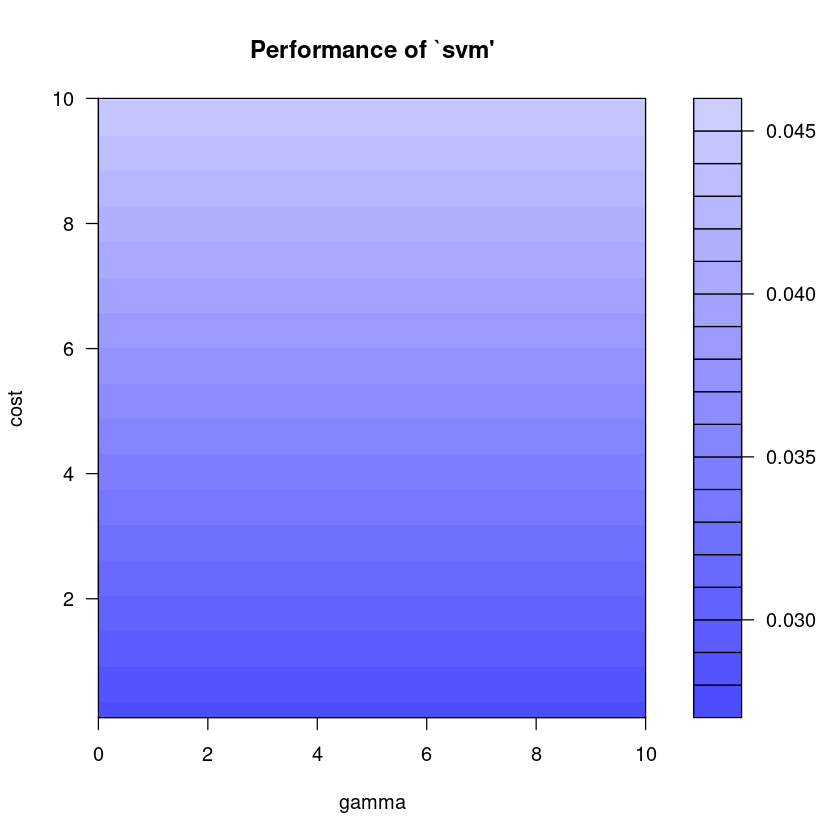

In [37]:
summary(svm_tune_cost_gamma)
plot(svm_tune_cost_gamma)

In [38]:
confusion_matrix_bm_gamma_svm <- table(test$diagnosis, prediction_best_model_gamma_svm)
confusion_matrix_bm_gamma_svm

   prediction_best_model_gamma_svm
     0  1
  0 97  1
  1  3 70

In [39]:
accuracy_bm_gamma_svm <- sum(diag(confusion_matrix_bm_gamma_svm))/sum(confusion_matrix_bm_gamma_svm)
print(paste("accuracy:", accuracy_bm_gamma_svm))

[1] "accuracy: 0.976608187134503"


-------------------------------------------------------------------------------------------------

**Random forest**

In [40]:
install.packages("randomForest")
library(randomForest)

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/randomForest_4.7-1.1.tar.gz' ...
	OK [downloaded 256.8 Kb in 0.7 secs]
Installing randomForest [4.7-1.1] ...
	OK [installed binary]
Moving randomForest [4.7-1.1] into the cache ...
	OK [moved to cache in 0.29 milliseconds]


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:psych’:

    outlier


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [41]:
rf_model <- randomForest(factor(diagnosis) ~ ., data = training, ntree = 100, importance = TRUE)
predicciones <- predict(rf_model, test)

In [42]:
confusion_matrix_rf <- table(test$diagnosis, predicciones)
accuracy_rf <- sum(diag(confusion_matrix_rf))/sum(confusion_matrix_rf)

print("Confusion matrix")
confusion_matrix_rf

print(paste("accuracy:", accuracy_rf))

[1] "Confusion matrix"


   predicciones
     0  1
  0 95  3
  1  4 69

[1] "accuracy: 0.95906432748538"


------------------------------------------------------------------------------------------------

**Decision tree**

In [43]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ psych::%+%()             masks ggplot2::%+%()
✖ scales::alpha()          masks psych::alpha(), ggplot2::alpha()
✖ randomForest::combine()  masks dplyr::combine()
✖ scales::discard()        masks purrr::discard()
✖ dplyr::filter()          masks stats::filter()
✖ recipes::fixed()         masks stringr::fixed()
✖ dplyr::lag()             masks stats::lag()
✖ caret::lift()            masks purrr::lift()
✖ randomForest::margin()   masks ggplot2::margin()
✖ rsample::permutations()  masks e1071::permutations()
✖ yardstick::precision()   masks caret::precision()
✖ yardstick::rec

In [44]:
decisionTree_spec <- decision_tree() %>%
set_engine("rpart") %>%
set_mode("classification")

In [45]:
decisionTree_spec <-decisionTree_spec %>%
	fit(formula = factor(diagnosis) ~ .,
	data = training)

In [46]:
predictionsDecisionTree <- predict(decisionTree_spec, test)

In [47]:
confusion_matrix_dTree <- table(test$diagnosis, predictionsDecisionTree$.pred_class)
accuracy_dTree <- sum(diag(confusion_matrix_dTree))/sum(confusion_matrix_dTree)

In [48]:
print("Confusion matrix")
confusion_matrix_dTree

print(paste("accuracy:", accuracy_dTree))

[1] "Confusion matrix"


   
     0  1
  0 91  7
  1  8 65

[1] "accuracy: 0.912280701754386"


------------------------------------------------------------------------------------------------

**Boost tree**

In [49]:
# Create the specification with placeholders
boost_spec <- boost_tree(
                trees = 500,
                learn_rate = tune(),
                tree_depth = tune(),
                sample_size = tune()) %>%
  set_mode("classification") %>%
  set_engine("xgboost")

In [50]:
# Create the tuning grid
tunegrid_boost <- grid_regular(parameters(boost_spec), 
                               levels = 3)

tunegrid_boost

Warning message:
“`parameters.model_spec()` was deprecated in tune 0.1.6.9003.
ℹ Please use `hardhat::extract_parameter_set_dials()` instead.”


tree_depth,learn_rate,sample_size
<int>,<dbl>,<dbl>
1,0.00100000,0.10
8,0.00100000,0.10
15,0.00100000,0.10
1,0.01778279,0.10
8,0.01778279,0.10
15,0.01778279,0.10
1,0.31622777,0.10
8,0.31622777,0.10
15,0.31622777,0.10


In [51]:
# Create CV folds of training data
folds <- vfold_cv(training, v = 6)

# Tune along the grid
tune_results <- tune_grid(boost_spec,
                          factor(diagnosis) ~ .,
                          resamples = folds,
                          grid = tunegrid_boost,
                          metrics = metric_set(roc_auc))

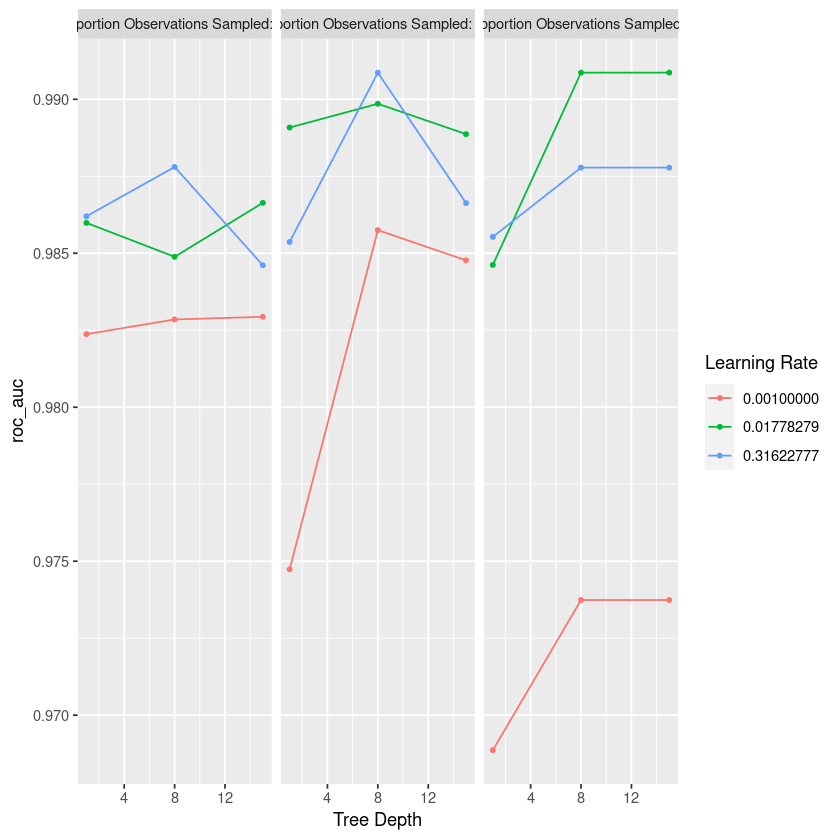

In [52]:
# Plot the results
autoplot(tune_results)

In [53]:
# Select the final hyperparameters
best_params <- select_best(tune_results)

best_params

tree_depth,learn_rate,sample_size,.config
<int>,<dbl>,<dbl>,<chr>
8,0.01778279,1,Preprocessor1_Model23


In [54]:
# Finalize the specification
final_spec <- finalize_model(boost_spec, best_params)
final_spec

Boosted Tree Model Specification (classification)

Main Arguments:
  trees = 500
  tree_depth = 8
  learn_rate = 0.0177827941003892
  sample_size = 1

Computational engine: xgboost 


In [56]:
# Train the final model on the full training data
final_model <- final_spec %>% fit(formula = factor(diagnosis) ~ ., 
                                  data = training)

final_model

parsnip model object

##### xgb.Booster
raw: 526.1 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.0177827941003892, max_depth = 8L, 
    gamma = 0, colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 1), data = x$data, nrounds = 500, watchlist = x$watchlist, 
    verbose = 0, nthread = 1, objective = "binary:logistic")
params (as set within xgb.train):
  eta = "0.0177827941003892", max_depth = "8", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "1", nthread = "1", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 30 
niter: 500
nfeatures : 30 
evaluation_log:
    iter training_logloss
       1       0.67763629
       2       0.66273041
---                      
     499       0.01247838
     500       0.01244818

In [57]:
predictionsBoost <- predict(final_model, test)

In [58]:
mean(predictionsBoost$.pred_class==test$diagnosis)

[1] 0.9473684

In [59]:
confusion_matrix_boost <- table(test$diagnosis, predictionsBoost$.pred_class)
accuracy_boost <- sum(diag(confusion_matrix_boost))/sum(confusion_matrix_boost)

print("Confusion matrix")
confusion_matrix_boost

print(paste("accuracy:", accuracy_boost))

[1] "Confusion matrix"


   
     0  1
  0 95  3
  1  6 67

[1] "accuracy: 0.947368421052632"
